In [49]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Merge, Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cmc.data',header=None,names=['Age','Education','H_education',
                                                     'num_child','Religion', 'Employ',
                                                     'H_occupation','living_standard',
                                                     'Media_exposure','contraceptive'])
df.head()

Age  Education  H_education  num_child  Religion  Employ  H_occupation  \
0   24          2            3          3         1       1             2   
1   45          1            3         10         1       1             3   
2   43          2            3          7         1       1             3   
3   42          3            2          9         1       1             3   
4   36          3            3          8         1       1             3   

   living_standard  Media_exposure  contraceptive  
0                3               0              1  
1                4               0              1  
2                4               0              1  
3                3               0              1  
4                2               0              1

In [3]:
df.isnull().any()

Age                False
Education          False
H_education        False
num_child          False
Religion           False
Employ             False
H_occupation       False
living_standard    False
Media_exposure     False
contraceptive      False
dtype: bool

In [4]:
df.shape

(1473, 10)

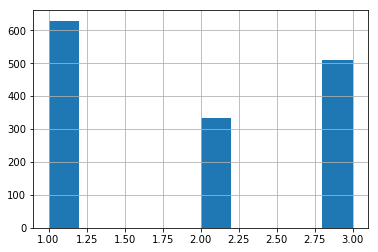

In [5]:
df.contraceptive.hist()

In [6]:
df.dtypes

Age                int64
Education          int64
H_education        int64
num_child          int64
Religion           int64
Employ             int64
H_occupation       int64
living_standard    int64
Media_exposure     int64
contraceptive      int64
dtype: object

In [12]:
def one_hot_encoding(idx):
    y = np.zeros((len(idx),max(idx)+1))
    y[np.arange(len(idx)), idx] = 1
    return y

In [50]:
scaler = StandardScaler()
df[['Age','num_child']] = scaler.fit_transform(df[['Age','num_child']]) 

In [29]:
x = df[['Age','num_child','Employ','Media_exposure']].values
y = one_hot_encoding(df.contraceptive.values-1)

liv_cats = df.living_standard.max()
edu_cats = df.Education.max()

liv = df.living_standard.values - 1
liv_one_hot = one_hot_encoding(liv)
edu = df.Education.values - 1
edu_one_hot = one_hot_encoding(edu)

train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv_one_hot,edu_one_hot,y,test_size=0.1, random_state=1)

In [34]:
train_x = np.hstack([train_x, train_edu, train_liv])
test_x = np.hstack([test_x, test_edu, test_liv])

In [22]:
model = Sequential()
model.add(Dense(input_dim=train_x.shape[1],output_dim=12))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100, verbose=2)

Epoch 1/100
0s - loss: 1.8914 - acc: 0.4045
Epoch 2/100
0s - loss: 1.0642 - acc: 0.4317
Epoch 3/100
0s - loss: 1.0623 - acc: 0.4294
Epoch 4/100
0s - loss: 1.0602 - acc: 0.4264
Epoch 5/100
0s - loss: 1.0582 - acc: 0.4287
Epoch 6/100
0s - loss: 1.0554 - acc: 0.4302
Epoch 7/100
0s - loss: 1.0555 - acc: 0.4340
Epoch 8/100
0s - loss: 1.0544 - acc: 0.4370
Epoch 9/100
0s - loss: 1.0542 - acc: 0.4219
Epoch 10/100
0s - loss: 1.0535 - acc: 0.4325
Epoch 11/100
0s - loss: 1.0497 - acc: 0.4272
Epoch 12/100
0s - loss: 1.0515 - acc: 0.4377
Epoch 13/100
0s - loss: 1.0497 - acc: 0.4325
Epoch 14/100
0s - loss: 1.0500 - acc: 0.4272
Epoch 15/100
0s - loss: 1.0488 - acc: 0.4309
Epoch 16/100
0s - loss: 1.0471 - acc: 0.4430
Epoch 17/100
0s - loss: 1.0452 - acc: 0.4294
Epoch 18/100
0s - loss: 1.0461 - acc: 0.4332
Epoch 19/100
0s - loss: 1.0456 - acc: 0.4370
Epoch 20/100
0s - loss: 1.0446 - acc: 0.4355
Epoch 21/100
0s - loss: 1.0437 - acc: 0.4392
Epoch 22/100
0s - loss: 1.0441 - acc: 0.4385
Epoch 23/100
0s - l

In [23]:
model.evaluate(test_x, test_y, batch_size=256)

148/148 [==============================] - 0s


[1.00490403175354, 0.5]

In [24]:
model.predict(test_x[:10])

array([[ 0.45012993,  0.22573498,  0.32413509],
       [ 0.61278081,  0.1857394 ,  0.20147982],
       [ 0.28402528,  0.27948779,  0.43648693],
       [ 0.26227722,  0.31508371,  0.42263907],
       [ 0.59369004,  0.19170636,  0.21460359],
       [ 0.40284708,  0.26274753,  0.33440539],
       [ 0.31861827,  0.27626175,  0.40511999],
       [ 0.58384669,  0.18544869,  0.23070464],
       [ 0.46458372,  0.20612505,  0.32929125],
       [ 0.5014475 ,  0.22525845,  0.27329403]], dtype=float32)

In [25]:
test_y[:10]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [37]:
liv

array([2, 3, 3, ..., 3, 1, 3])

In [53]:
train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv,edu,y,test_size=0.1, random_state=1)

In [54]:
# Input layer for religion
encoder_liv = Sequential()
encoder_liv.add(Embedding(liv_cats,3,input_length=1))
encoder_liv.add(Flatten())

# Input layer for religion
encoder_edu = Sequential()
encoder_edu.add(Embedding(edu_cats,3,input_length=1))
encoder_edu.add(Flatten())

# Input layer for triggers(x_b)
dense_x = Sequential()
dense_x.add(Dense(4, input_dim=x.shape[1]))

model = Sequential()
model.add(Merge([encoder_liv, encoder_edu, dense_x], mode='concat'))
model.add(Activation('relu'))
# model.add(Dense(output_dim=4))
# model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.fit([train_liv[:,None], train_edu[:,None], train_x], train_y, nb_epoch=100, verbose=2)

Epoch 1/100
0s - loss: 1.1786 - acc: 0.3879
Epoch 2/100
0s - loss: 1.1119 - acc: 0.3434
Epoch 3/100
0s - loss: 1.1045 - acc: 0.3472
Epoch 4/100
0s - loss: 1.1000 - acc: 0.3457
Epoch 5/100
0s - loss: 1.0963 - acc: 0.3721
Epoch 6/100
0s - loss: 1.0928 - acc: 0.3781
Epoch 7/100
0s - loss: 1.0900 - acc: 0.3781
Epoch 8/100
0s - loss: 1.0874 - acc: 0.3834
Epoch 9/100
0s - loss: 1.0850 - acc: 0.3932
Epoch 10/100
0s - loss: 1.0830 - acc: 0.4143
Epoch 11/100
0s - loss: 1.0808 - acc: 0.4196
Epoch 12/100
0s - loss: 1.0787 - acc: 0.4211
Epoch 13/100
0s - loss: 1.0769 - acc: 0.4226
Epoch 14/100
0s - loss: 1.0752 - acc: 0.4211
Epoch 15/100
0s - loss: 1.0739 - acc: 0.4219
Epoch 16/100
0s - loss: 1.0726 - acc: 0.4204
Epoch 17/100
0s - loss: 1.0714 - acc: 0.4196
Epoch 18/100
0s - loss: 1.0703 - acc: 0.4219
Epoch 19/100
0s - loss: 1.0692 - acc: 0.4234
Epoch 20/100
0s - loss: 1.0682 - acc: 0.4234
Epoch 21/100
0s - loss: 1.0672 - acc: 0.4249
Epoch 22/100
0s - loss: 1.0663 - acc: 0.4257
Epoch 23/100
0s - l

In [45]:
test_liv[:,None].shape

(148, 1)

In [48]:
model.evaluate([test_liv[:,None], test_edu[:,None], test_x],test_y, batch_size=256)

148/148 [==============================] - 0s


[0.98484480381011963, 0.48648649454116821]

In [43]:
p = model.predict([test_liv[:,None], test_edu[:,None], test_x], batch_size=256)
p[:5]

array([[ 0.49308839,  0.17379916,  0.33311245],
       [ 0.40720317,  0.25556412,  0.33723271],
       [ 0.49308839,  0.17379916,  0.33311245],
       [ 0.40720317,  0.25556412,  0.33723271],
       [ 0.36428297,  0.2926755 ,  0.34304154]], dtype=float32)

In [54]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_10 (Embedding)         (None, 1, 4)          16                                           
____________________________________________________________________________________________________
flatten_10 (Flatten)             (None, 4)             0                                            
____________________________________________________________________________________________________
embedding_11 (Embedding)         (None, 1, 4)          16                                           
____________________________________________________________________________________________________
flatten_11 (Flatten)             (None, 4)             0                                            
___________________________________________________________________________________________

In [64]:
model = Sequential()
model.add(Dense(4, input_dim=x.shape[1]))
model.add(Activation('relu'))
model.add(Dense(output_dim=1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100)

Epoch 1/100
1325/1325 [==============================] - 0s - loss: 0.6720 - acc: 0.2453     
Epoch 2/100
1325/1325 [==============================] - 0s - loss: -0.7079 - acc: 0.4264     
Epoch 3/100
1325/1325 [==============================] - 0s - loss: -1.7836 - acc: 0.4264     
Epoch 4/100
1325/1325 [==============================] - 0s - loss: -2.7790 - acc: 0.4264     
Epoch 5/100
1325/1325 [==============================] - 0s - loss: -3.7540 - acc: 0.4264     
Epoch 6/100
1325/1325 [==============================] - 0s - loss: -4.7403 - acc: 0.4264     
Epoch 7/100
1325/1325 [==============================] - 0s - loss: -5.7370 - acc: 0.4264     
Epoch 8/100
1325/1325 [==============================] - 0s - loss: -6.7459 - acc: 0.4264     
Epoch 9/100
1325/1325 [==============================] - 0s - loss: -7.7802 - acc: 0.4264     
Epoch 10/100
1325/1325 [==============================] - 0s - loss: -8.8112 - acc: 0.4264     
Epoch 11/100
1325/1325 [==========================

In [95]:
model.fit?